# Primjena BFS i DFS algoritma za rješavanje labirinta

<br>

**Sadržaj:**
* 1.[Uvod - Općenito o grafovima](#uvod)
* 2.[Pretraživanje prostora stanja](#pps)
    * 2.1 [BFS](#bfs)
    * 2.2 [DFS](#dfs)
* 3.[Primjena BFS i DFS](#labirint)
* 4.[Zaključak](#kraj)
* 5.[Literatura](#lit)

## Općenito o grafovima <a name="uvod"></a>


**Def:** <i>**Jednostavan graf G** sastoji se od nepraznog konačnog skupa skupa V čije
elemente zovemo **vrhovi** i konačnog skupa E različitih parova elemenata V koje
zovemo **bridovi**.</i>

Smatramo da je graf zadan ako su zadani njegovi skupovi vrhova i bridova. Označavamo ga s **G(V,E)**.

**Oznake:**
* U teoremima i definicijama vrhove obično označavamo malim slovima  *u,v*, a bridove slovima *e,f*. 
* Brid između vrhova *u* i *v* označavamo sa *e={u,v}* ili *e=uv*. 
* U grafovima vrhove označavamo velikim tiskanim slovima A,B,C, ...
<br><br>

**Def:** <i>Za vrhove u i v kažemo da su ***susjedni*** ako postoji brid *e=uv* u tom grafu koji
ih spaja. Za bridove e i f kažemo da su susjedni ako postoji vrh u u tom grafu koji je njima
zajednički.</i> 
<br><br>


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import deque

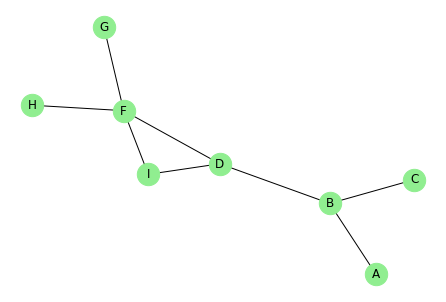

In [2]:
df = pd.DataFrame({'source': ['A', 'B','B','D','F','F','D','I'],
                   'target': ['B','C','D','F','G','H','I','F']})
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df)
nx.draw(g1, with_labels=True, node_color="lightgreen", node_shape='o', node_size=500)
plt.draw()

    Slika 1. Primjer grafa

**Def:** <i>**Put u grafu G** je konačan slijed bridova v1v2,v2v3,…,vn-1vn u kojem su svaka
dva brida susjedna i svi su vrhovi različiti, osim eventualno početni i krajnji. Put možemo
označavati i kao v1 → v2 → v3 → ... → vn.</i>

**Def:** <i>Za graf G kažemo da je **povezan** onda i samo onda ako postoji put između
svaka dva vrha.</i>
<br><br>

Na slici 1. vidimo primjer povezanog grafa, a u donjem primjeru ćemo vidjeti primjer nepovezanog.

In [3]:
g1.remove_node('D')
g1.nodes() #ispisuje nam sve vrhove u grafu 

NodeView(('A', 'B', 'C', 'F', 'G', 'H', 'I'))

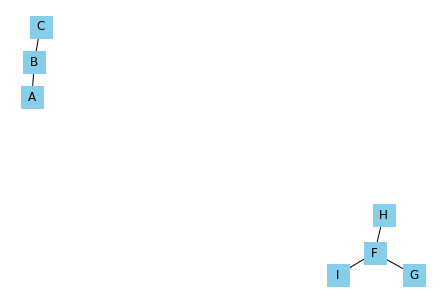

In [4]:
nx.draw(g1, with_labels=True, node_color="skyblue", node_shape='s', node_size=500)
plt.show()

    Slika 2. Primjer nepovezanog grafa

**Def:** *Kažemo da je graf **potpuno povezan** ako su svaka dva vrha u grafu povezana točno jednim bridom.*

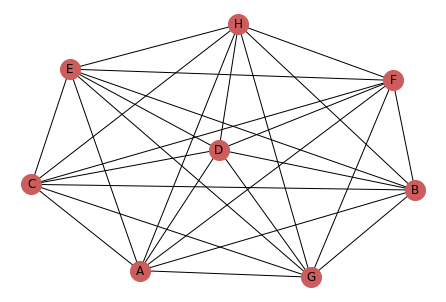

In [5]:
g2=nx.Graph()
nodes2=np.array(['A','B','C','D','E','F','G','H'])
n=nodes2.size
for i in range(0,n,1):
    g2.add_node(nodes2[i])
    
g2=nx.complete_graph(g2.nodes())

nx.draw(g2, with_labels=True, node_size=400, node_shape='o', node_color="indianred")

    Slika 3. Primjer potpuno povezanog grafa

* 1.TU TREBA SMISLITI NEKI PRIJELAZ
* 2.POGLEDATI MOZE LI SE MIJENJATI FONT

g2.size() #[n for n in g2.edges]
a=np.array(g2.edges)
s=a.shape[0]
for n in g2:
    print(n, ' : ')
    for i in range (0,s,1):
        if(n == a[i][0]):
            print (a[i][1])
        elif (n == a[i][1]):
            print (a[i][0])

## Pretraživanje prostora stanja <a name="pps"></a>

DODATI TEKSTIC

### BFS <a name="bfs"></a>

In [6]:
br_bfs=0
br_dfs=0

In [7]:
graph = {'A': ['B', 'C','E'],
         'B': ['A', 'C'],
         'C': ['B','D'],
         'D': ['C', 'E'],
         'E': ['F','D'],
         'F': ['C']}

In [8]:
def isDefined(Dict, Key):
    for k in Dict:
        if k==Key:
            return True
    return False

In [9]:
def find_path_bfs(Dict, last):
    
    prev = Dict[last]
    path=deque()
    path.append(last)
    
    while(prev!=0):
        path.append(prev)
        prev=Dict[prev]
                
    path.reverse()
    return path

In [21]:
def BFS(graph,first,last):
    
    global br_bfs
    br_bfs = 0
    visited_bfs = list()
    
    q=deque()
    q.append(first)
    
    prev = dict()
    prev[first]=0

    while q:
        node = q.popleft()
        if not(node in visited_bfs):
            br_bfs+=1
            visited_bfs.append(node)
            if(node==last):
                break
            
            for neighbor in graph[node]:
                q.append(neighbor)
                if not isDefined(prev, neighbor):
                    prev[neighbor] = node
                
            
    path=find_path_bfs(prev, last)
    print (prev)
    print (f'visited_bfs)
    print (path)
    

In [29]:
for node in graph:
    graph[node].sort
graph

{'A': ['B', 'C', 'E'],
 'B': ['A', 'C'],
 'C': ['B', 'D'],
 'D': ['C', 'E'],
 'E': ['F', 'D'],
 'F': ['C']}

In [30]:
BFS(graph, 'A','D')

{'A': 0, 'B': 'A', 'C': 'A', 'E': 'A', 'D': 'C', 'F': 'E'}
['A', 'B', 'C', 'E', 'D']
deque(['A', 'C', 'D'])


In [23]:
br_bfs

5

In [52]:
def DFS (graph, first, last): #graph je u dict obliku
    
    global br_dfs
    br_dfs = 0
    visited_dfs = list()
    
    stack = deque()
    stack.append(first)
    
    prev=dict()
    prev[first]=0
    
    while stack:
        node = stack.pop()
        
        if not (node in visited_dfs):
            br_dfs+=1
            visited_dfs.append(node)
            if(node == last):
                break
            
            for neighbor in graph[node]:
                stack.append(neighbor)
                prev[neighbor]=node
                
    
    print (f'Broj posjecenih: {br_dfs} \nLista posjecenih: {visited_dfs}')
    print (prev)
    
    

In [46]:
for node in graph:
    graph[node].sort(reverse=True)
graph

{'A': ['E', 'C', 'B'],
 'B': ['C', 'A'],
 'C': ['D', 'B'],
 'D': ['E', 'C'],
 'E': ['F', 'D'],
 'F': ['C']}

In [47]:
DFS(graph, 'A', 'D')

['A', 'B', 'C', 'D']
{'A': 'B', 'E': 'A', 'C': 'B', 'B': 'C', 'D': 'C'}


### DFS <a name="dfs"></a>

## Primjena BFS i DFS <a name="labirint"></a>

In [274]:
def maze():
    maze=[]
    maze.append(['#','#','S',' ','#',' ','#','#','#',' ',' ','#',' ','#'])
    maze.append(['#',' ',' ','#','#',' ',' ','#','#',' ',' ','#',' ','#'])
    maze.append([' ','#','#',' ',' ','#',' ',' ',' ','#','#','#',' ',' '])
    maze.append(['#',' ','#','#','#','#',' ','#',' ',' ','#','#',' ',' '])
    maze.append(['#','#',' ',' ',' ','#','#','#','#','#',' ','#','#','#'])
    maze.append(['#',' ',' ','#','#',' ','#','#','#',' ',' ','#','#','#'])
    maze.append([' ',' ','#',' ','#',' ','#',' ','#','#',' ','#','#','#'])
    maze.append(['#','#',' ',' ',' ',' ','#','#','#',' ',' ','#',' ','#'])
    maze.append(['#',' ',' ','#','#',' ',' ',' ','#',' ',' ','#',' ','#'])
    maze.append([' ','#','#',' ','#','#',' ','#',' ',' ','#','#',' ',' '])
    maze.append(['#',' ','#','#',' ','#',' ','#',' ',' ','#','#',' ',' '])
    maze.append(['#','#',' ',' ','#','#','#','#','#',' ',' ','#','#','#'])
    maze.append(['#',' ',' ','#','#',' ','#','#','#',' ',' ','#','#','#'])
    maze.append([' ',' ','#',' ','#',' ','#','#','#',' ','E','#','#','#'])
    
    return maze

In [283]:
a=maze()
for i in range (0,len(a),1):
    print (a[i])
print(len(a))
a[0][2]

['#', '#', 'S', ' ', '#', ' ', '#', '#', '#', ' ', ' ', '#', ' ', '#']
['#', ' ', ' ', '#', '#', ' ', ' ', '#', '#', ' ', ' ', '#', ' ', '#']
[' ', '#', '#', ' ', ' ', '#', ' ', ' ', ' ', '#', '#', '#', ' ', ' ']
['#', ' ', '#', '#', '#', '#', ' ', '#', ' ', ' ', '#', '#', ' ', ' ']
['#', '#', ' ', ' ', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#']
['#', ' ', ' ', '#', '#', ' ', '#', '#', '#', ' ', ' ', '#', '#', '#']
[' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', ' ', '#', '#', '#']
['#', '#', ' ', ' ', ' ', ' ', '#', '#', '#', ' ', ' ', '#', ' ', '#']
['#', ' ', ' ', '#', '#', ' ', ' ', ' ', '#', ' ', ' ', '#', ' ', '#']
[' ', '#', '#', ' ', '#', '#', ' ', '#', ' ', ' ', '#', '#', ' ', ' ']
['#', ' ', '#', '#', ' ', '#', ' ', '#', ' ', ' ', '#', '#', ' ', ' ']
['#', '#', ' ', ' ', '#', '#', '#', '#', '#', ' ', ' ', '#', '#', '#']
['#', ' ', ' ', '#', '#', ' ', '#', '#', '#', ' ', ' ', '#', '#', '#']
[' ', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', 'E', '#', '#', '#']
14


'S'

In [15]:
def maze_to_graph(maze):
    
    graph = dict()
    neighbor=[] #lista susjeda
    n=len(maze)
    pos=-1 
    
    for i in range (0,n,1):
        for j in range(0,n,1):
            neighbor=[]
            pos+=1
            if(maze[i][j]!='#'):
                if(i+1<n and maze[i+1][j]!='#'):
                    down = pos+n
                    neighbor.append(down) #dozvoljen je pomak desno
                if(i-1>=0 and maze[i-1][j]!='#'):
                    up = pos-n
                    neighbor.append(up)
                if(j+1<n and maze[i][j+1]!='#'):
                    right = pos+1
                    neighbor.append(right)
                if(j-1>=0 and maze[i][j-1]!='#'):
                    left = pos-1
                    neighbor.append(left)
                graph[pos]=neighbor
    
    #print (graph)
    return graph
    
## MOZDA BI TREBALO SORTIRATI ? ? ---Prije pozivanja BFS i DFS ovisno koji pozivamo
## BFS treba sort, a DFS sort(reverse=True)

<font color=green>**Objašnjenje fje maze_to_graph:**</font> <br>
Želimo zadani labirint pretvoriti u graf. <br>Prazna polja u labirintu smatrat ćemo vrhovima grafa kojeg stvaramo. Polja koja su zauzeta (prepreke) ne ubacujemo u graf. <br>
Broj čvora smo odredili pomoću varijable pos koju povećavamo u svakom koraku kad se pomaknemo za jedno polje dalje u listi.
<br>`pozicija (i , j) = ( pos%n, floor(pos/n))`
<table>
    <tr><td>0</td><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>6</td><td>7</td><td>8</td></tr>
</table>
<br>
Graf spremamo u dictionary oblika cvor: [susjedi] <br>
pr. 1: [4,2]  znači da su susjedi od čvora 1, čvorovi 4 i 2.

In [39]:
b=maze_to_graph(a)
for i in b:
    b[i].sort()
b

{1: [2, 4],
 2: [1, 5],
 3: [4, 6],
 4: [1, 3, 5, 7],
 5: [2, 4],
 6: [3, 7],
 7: [4, 6]}

In [38]:
BFS(b,6,2)

{6: 0, 3: 6, 7: 6, 4: 3, 1: 4, 5: 4, 2: 1}
[6, 3, 7, 4, 1, 5, 2]
deque([6, 3, 4, 1, 2])


In [42]:
for i in b:
    b[i].sort(reverse=True)
b

{1: [4, 2],
 2: [5, 1],
 3: [6, 4],
 4: [7, 5, 3, 1],
 5: [4, 2],
 6: [7, 3],
 7: [6, 4]}

In [53]:
DFS(b,6,2)

Broj posjecenih: 5 
Lista posjecenih: [6, 3, 4, 1, 2]
{6: 3, 7: 4, 3: 4, 4: 1, 5: 4, 1: 4, 2: 1}


14


[]

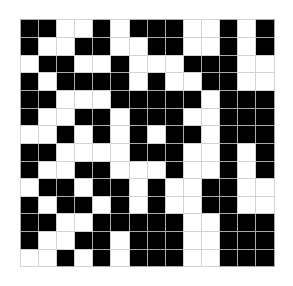

In [309]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
plt.rcParams['figure.max_open_warning'] = 200

g=maze()
size=len(g)
print(size)

fig, ax = plt.subplots(figsize=(5,5))
rects_b=[]
rects_w=[]
rects_p=[]

colors=np.arange(10000)
for i in range(0,10000,1):
    colors[i]=0
    
for i in range (0,size,1):
    for j in range(0,size,1):
        if(g[i][j]=='#'):
            rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
            rects_b.append(rectangle)
        elif(g[i][j]!='#'):
            rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
            rects_w.append(rectangle)
                       
                       
rect_pcs_b = PatchCollection(rects_b, edgecolor='darkgray', cmap='gray')
rect_pcs_w = PatchCollection(rects_w, edgecolor='lightgray', cmap='Greys')
rect_pcs_p = PatchCollection(rects_p, edgecolor='lightgray', cmap='summer')
    
rect_pcs_b.set_array(colors)
rect_pcs_w.set_array(colors)
rect_pcs_p.set_array(colors)
    
ax.add_collection(rect_pcs_b)
ax.add_collection(rect_pcs_w)
ax.add_collection(rect_pcs_p)
ax.set_axis_off()
ax.plot()   



## Zaključak <a name="kraj"></a>

## Literatura: <a name="lit"></a>
* http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf 
* https://docs.python.org/3/library/collections.html#collections.deque
* https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.patches.Rectangle.html
* https://networkx.github.io/documentation/networkx-2.4/reference/index.html
* https://web.math.pmf.unizg.hr/nastava/komb/predavanja/predavanja.pdf
* http://www.zemris.fer.hr/predmeti/mr/arhiva/2002-2003/seminari/finished/pdf/grafovi.pdf 


<font color=red>IDEJE:
* <font color=green> dfs </font>
* u bfs dodati globalno polje posjeceni
* treba nacrtati graf na pocetku i nakraju
* osmisliti nacin za generiranje labirinta ili spremiti njih nekoliko na git u ms i povuci ovdje
* dodati tekstove malo
* mozda naci nesto zanimljivo o grafovima za dio opcenito
* spomenuti i nacrtati usmjereni graf na pocetku pretrazivanja stanja
* osmisliti nacin za usporediti bfs i dfs
    * mozda napraviti za labirinte razlicitih dimenzija (slucajno generirane ili namjestene) i nacrtati histogram za svaki slucaj (svi stupici na jednom grafu)
    * prosjecna duljina puta ? 
        * ne znam ima li to smisla
 </font>  